In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy.matlib 
import csv

Question 1: Equation-Bases Modelling
- Exercise 1:

* part 1: This system is non-autonomous because the function  f(x(t),t)  has term that depends explicitly on t. Indeed,  f(x(t),t)=${\text{tanh}(\frac{\text{cos(ωt)}}{1+t})}$, and the dependence on t are x(t) and $\frac{\text{cos(ωt)}}{1+t}$. 

* part 2: $$\dfrac{\mathrm{d}x(t)}{\mathrm{d}t} = -\alpha x(t) + {\text{tanh}(\frac{\text{cos(ωt)}}{1+t})}$$

$${\frac {x(t+ \delta t)-x(t)} {\delta t}} = -\alpha x(t) + {\text{tanh}(\frac{\text{cos(ωt)}}{1+t})}$$

$$ {x(t+ \delta t)} = (-\alpha x(t) + {\text{tanh}(\frac{\text{cos(ωt)}}{1+t})})*{\delta t}+x(t) $$

* part 3: 





In [2]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
    
    def Initialise(self,x_start,t_start):
        
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        ## WRITE YOUR CODE HERE TO PERFORM EULER (USE A FOR LOOP...)
        for t in range(1,N_iter):

          X[t] = X[t-1] + self.f(X[t-1],T[t-1]) * dt  
          T[t] = T[t-1] + dt
            
        return X, T  

    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        ## WRITE YOUR CODE HERE TO PERFORM RUNGE KUTTA (USE A FOR LOOP...)
        for n in range(1,N_iter):
          
          k1 = []
          k2 = []

          k1 = np.zeros([N_iter])
          k2 = np.zeros([N_iter])

          k1[0] = self.f(self.x,self.t)
          k2[0] = self.f(self.x + k1[0]*dt, self.t + dt)

          k1[n] = self.f(X[n-1],n)
          k2[n] = self.f(X[n-1] + k1[n]*dt, n+dt)

          X[n] = X[n-1] + (k1[n] + k2[n]) * dt / 2

          T[n] = T[n-1] + dt

            
        return X, T           

In [3]:
def f(x,t):    
 
    alpha=0.5
    ω = 5   
    y=-alpha*x + math.tanh(math.cos(ω*t)/(1+t))
    
    return y

NM=Numerical_methods(f)    ## Object definition

##SET Initial conditions
dt1 = 0.1
dt2 = 0.001
x_start = 0
t_start = 0

N_iter1 = int(15/dt1)
N_iter2 = int(15/dt2)

ts1=np.arange(0,N_iter1)*dt1
ts2=np.arange(0,N_iter2)*dt2

## USE THE CLASS ABOVE TO SIMULATE THE SYSTEM
init_val = NM.Initialise(x_start,t_start)
euler1 = NM.Euler(dt1,N_iter1) #euler1 is a tuple, euler1[0] are euler values, euler1[1] are T
euler2 = NM.Euler(dt2,N_iter2)

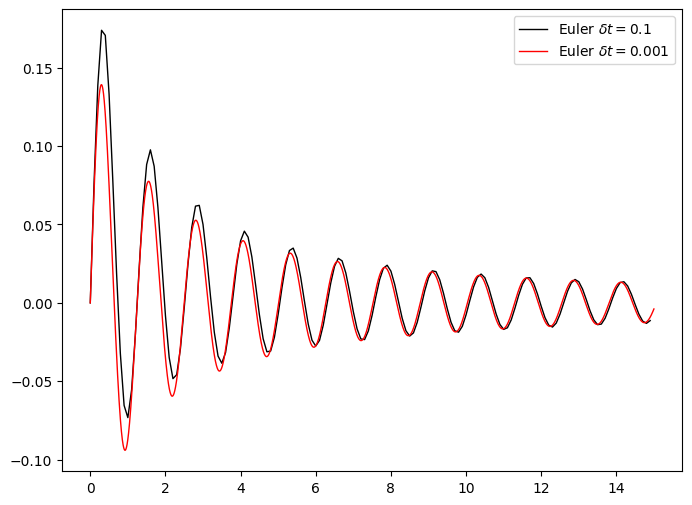

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))    
plt.rcParams.update({'font.size': 10}) 

p0,=plt.plot(ts1,euler1[0],lw=1,color='black')

p1,=plt.plot(ts2,euler2[0],lw=1,color='red')

plt.legend([p0,p1],['Euler $\delta t=0.1$','Euler $\delta t=0.001$'])



* part 4 - Describe Runge-Kutta 2:





* part 5



In [ ]:
dt3 = 0.1
N_iter3 = int(10/dt3)
ts3=np.arange(0,N_iter3)*dt3
x_start = 0
t_start = 0

init_val = NM.Initialise(x_start,t_start)
euler3 = NM.Euler(dt3,N_iter3)
rk2= NM.RungeKutta2(dt3,N_iter3)

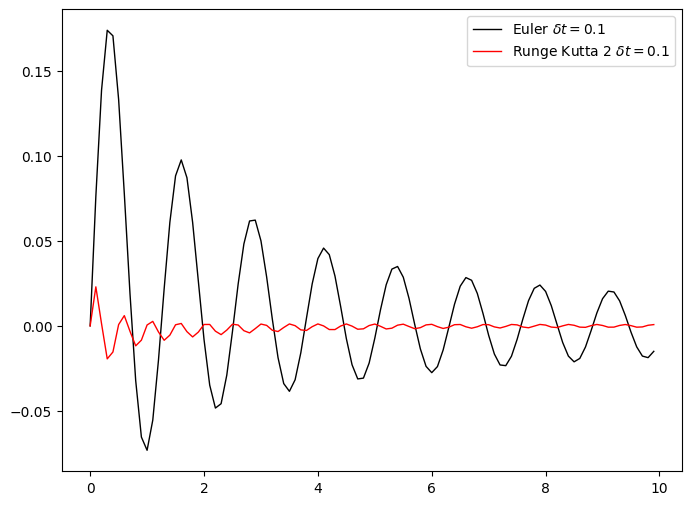

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))    
plt.rcParams.update({'font.size': 10}) 

p0,=plt.plot(ts3,euler3[0],lw=1,color='black')

p1,=plt.plot(ts3,rk2[0],lw=1,color='red')

plt.legend([p0,p1],['Euler $\delta t=0.1$','Runge Kutta 2 $\delta t=0.1$'])